In [ ]:
import pandas as pd
data=pd.read_csv('C:\\Users\\Shreya choudhary\\ecsvfile.txt', sep=" ",names=["Catalina_Surveys_ID","ID","RA_(J2000)"," Dec ","V_(mag)","Period_(days)","Amplitude","Number_Obs","Var_Type"])
data1=pd.read_csv('C:\\Users\\Shreya choudhary\\Downloads\\ttt\\ALLVar', sep=",",header=None ,names=["ID","MJD","Mag","Magerr","RA","Dec"])
result = data[['ID','Var_Type']].merge(data1[['ID','MJD','Mag']], on = 'ID',how = 'left')
result1=result.round({'Mag': 6})
result1.to_csv('merged.txt', encoding='utf-8',index=False)


In [ ]:
import os
import time
from sklearn.utils import shuffle

import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import itertools

from lasagne import random as lasagne_random
from lasagne import layers
from lasagne.nonlinearities import softmax, tanh
from lasagne import objectives
from lasagne import updates

import theano
import theano.tensor as T

import warnings
warnings.filterwarnings("ignore")

In [3]:
(result1.loc[result1['Var_Type'] == 13]).to_csv('vartype_13_data.txt',encoding='utf-8',index=False)


In [4]:
import pandas as pd
data2=pd.read_csv('C:\\Users\\Shreya choudhary\\vartype_13_data.txt')
data3 = data2.groupby('ID')
data3.apply(lambda x: x.to_csv('ID' + str(x.name) + '.txt',index=False,header=None))

""


0.237069633467746
0.10273017450268994
0.015804642231183066
0.0711208900403238
0.09482785338709841
0.05531624780914074
0.17385106454301374
0.11063249561828148
0.0711208900403238
0.18175338565860527
0.118534816733873
0.17385106454301374
0.09482785338709841
0.1422417800806476
0.13433945896505609
0.3081905235080698
0.18175338565860527
0.26077659681452064
0.1422417800806476
0.1580464223118307
0.37140909243280207
0.25287427569892906
0.2844835601612952
0.16594874342742222
0.05531624780914074
0.07902321115591535
0.07902321115591535
0.007902321115591533
0.03160928446236613
0.023706963346774603
0.007902321115591533
0.03160928446236613
0.03951160557795767
0.015804642231183066
0.03951160557795767
0.03160928446236613
0.1580464223118307
0.118534816733873
0.08692553227150687
0.13433945896505609
0.047413926693549206
0.03951160557795767
0.07902321115591535
0.1580464223118307
0.2133626701209714
0.03160928446236613
0.0711208900403238
0.023706963346774603
0.0711208900403238
0.0711208900403238
0.1896557067

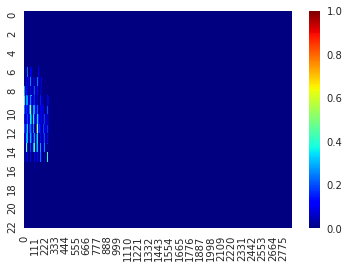

In [8]:
import pandas as pd
import glob
import numpy as np

#l = [pd.read_csv(filename) for filename in glob.glob("C:\\Users\\Shreya choudhary\\variable type\\*.txt")]


#file_list = glob.glob("/home/dic/jupyter/var4_txtfiles" + "/*.txt") #Get folder path containing text files

#print(file_list)
d=1
#for file_path in file_list:
    #print(file_path)
ID,Var_Type,MJD,Mag=np.loadtxt("/home/dic/jupyter/var4_txtfiles/ID1001006032764.txt", unpack=True, delimiter=',')
c=[]
e=[]
for i in range(0,len(Mag)):
    for j in range(i+1,len(Mag)):
        c.append(Mag[i]-Mag[j])
    #print(c)   
for i in range(0,len(MJD)):
    for j in range(i+1,len(MJD)):
        e.append(MJD[j]-MJD[i])
    #print(e)
s1 = pd.Series(c, name='dm_y')

s2 = pd.Series(e,name='dt_x')



#Assigning bins to all dmdt values

bins=[-8,-5,-3,-2.5,-2,-1.5,-1,-0.5,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.5,1,1.5,2,2.5,3,5,8]
bins1=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,2510,2520,2530,2540,2550,2560,2570,2580,2590,2600,2610,2620,2630,2640,2650,2660,2670,2680,2690,2700,2710,2720,2730,2740,2750,2760,2770,2780,2790,2800,2810,2820,2830,2840,2850,2860,2870] #bins of x axis
return_bins_of_s2= np.digitize(s2, bins1) # np.digitize gives the bin number to which a particular value of dm, dt belongs to.
return_bins_of_s1 = np.digitize(s1, bins)
ybins = pd.Series(return_bins_of_s1, name='ybin')
xbins = pd.Series(return_bins_of_s2, name='xbin')

dmdt=pd.concat([s1, s2,ybins,xbins], axis=1)
    #print(dmdt)


# exclude all the values from dataframe dmdt that are outside the bin boundries i.e. bin number 0, 23 and 24
dmdt=dmdt[dmdt.ybin != 23]
dmdt=dmdt[dmdt.xbin != 0]
dmdt=dmdt[dmdt.ybin != 0]
dmdt=dmdt[dmdt.xbin != 2880]


dmdt['bins_xaxis']=pd.cut(dmdt['dt_x'],bins1) #pd.cut gives range of bin for all dt_x values 
dmdt['bins_yaxis']=pd.cut(dmdt['dm_y'],bins)


dmdt['merged_dmdt']=  dmdt.dm_y.map(str) + ',' + dmdt.dt_x.map(str)
dmdt['dmdt_bin_number']=  dmdt.ybin.map(str) + ',' + dmdt.xbin.map(str)

dmdt.dropna() # drops all the values with NaN in dataframe dmdt
    #print(dmdt)
 

dmdtpairs=len(dmdt.dm_y) # number of dmdtpairs for a light curve of length n that falls under the given bin range
    #print(dmdtpairs)


#grouping and counting all the values that fall in all individual bins
df=dmdt.groupby('dmdt_bin_number',sort=False).merged_dmdt.agg(['count']) #counts how many merged_dmdt benlongs to each 'dmdt_bin_number' range
    #print(df)
df.to_csv('/home/dic/jupyter/count155.txt',encoding='utf-8')

data_count=pd.read_csv('/home/dic/jupyter/count155.txt')

ldf=dmdt.set_index('dmdt_bin_number').join(data_count.set_index('dmdt_bin_number'))

abcc=ldf.dropna()
final=abcc.drop_duplicates(['ybin','xbin']) # drops all the rows where both of values of ybin and xbin are duplicate
final1=final.drop(['bins_xaxis','bins_yaxis','merged_dmdt'],axis=1)
    #print(final1)
final1.to_csv('/home/dic/jupyter/final_table1155.txt',encoding='utf-8',header=None,index=False)

    
dm,dt,xbin,ybin,count=np.loadtxt('/home/dic/jupyter/final_table1155.txt',unpack=True,delimiter=',',dtype="i")

# assignig intensity values to each bin. Bins are in the form of 23x24 numpy array

aa = np.zeros(shape=(23,2870))
for gg in range(0,len(xbin)):
                    
    l1=xbin[gg]
    m1=ybin[gg]
    o1=count[gg]
    i1=(255 * o1)/(dmdtpairs + 0.99999)
    print(i1)
    aa[l1-1,m1-1]=i1
            
    #print (aa)  
    
import seaborn as sns
sns.set()
image11=sns.heatmap(aa,cmap='jet',vmin=0, vmax=1,cbar=True)
#,square=False,xticklabels=True, yticklabels=True
#image11=sns.heatmap(aa,xticklabels=False, yticklabels=False)
#vmin=0, vmax=255,
#cmap='RdYlBu'// colormap of heatmap
#sns_plot.figure.savefig("output.png")
    #, bbox_inches = 'tight',pad_inches = 0
image11.figure.savefig("/home/dic/jupyter/image_var4_dt_elongated"+"/var.fig%d.png" %d, bbox_inches = 'tight',pad_inches = 0)
    #d+=1
                    